In [9]:
import numpy as np
import sys
import os
import argparse
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
import scipy.stats

# # latex rendering
# mpl.rcParams['text.usetex'] = True

plt.rcParams['font.size'] = 15.5
plt.rcParams['axes.labelsize'] = 15.5
plt.rcParams['xtick.labelsize'] = 15.5
plt.rcParams['ytick.labelsize'] = 15.5
plt.rcParams['legend.fontsize'] = 15.5

In [10]:
NaId = [1,376]
numNa = NaId[1] - NaId[0] + 1

SbId = [377,504]
numSb = SbId[1] - SbId[0] + 1

SeId = [505,1016]
numSe = SeId[1] - SeId[0] + 1

# degrees of freedom
dof = 3

In [11]:
# simulation parameters
dt_sim = 0.002;
ss_per_ts = 1
delT = dt_sim * ss_per_ts;

t_tot = 15
total_ts = 7500
num_ss = t_tot / delT + 1
N_delt = int(t_tot / delT)

numAtoms = 1016

print("delT = ", delT)
print("N_delt = ", N_delt)

delT =  0.002
N_delt =  7500


### We first compare the FOM and ROM for the different Potentials

In [12]:
trunc_err_Lst = ["1e-3", "1e-4", "1e-5", "1e-6"]
label_trunc_err_Lst = [r"$1e^{-3}$", r"$1e^{-4}$", r"$1e^{-5}$", r"$1e^{-6}$"]

In [13]:
# print current working directory
print(os.getcwd())

savefig_dir = f"{os.getcwd()}/figs_15ps/msd_across_gamma"
if not os.path.exists(savefig_dir):
    os.makedirs(savefig_dir)
print(savefig_dir)

/data1/yq87/CRISPS/Na3SbSe4-May62024/SIM_15ps_ALLSS
/data1/yq87/CRISPS/Na3SbSe4-May62024/SIM_15ps_ALLSS/figs_15ps/msd_across_gamma


In [14]:
# load data
root = os.getcwd()
pot_label_lst = ['NEP', 'MLIP']
atom_label_lst = ['Na', 'Sb', 'Se']

# load data
msd_data = {}
for pot_label in pot_label_lst:
    msd_data[pot_label] = {}
    for atom_label in atom_label_lst:
        msd_data[pot_label][atom_label] = np.loadtxt(f'{root}/fom_data_15ps/{pot_label}/compute_msd{atom_label}.txt')
        print(msd_data[pot_label][atom_label].shape)

(7501,)
(7501,)
(7501,)
(7501,)
(7501,)
(7501,)


In [15]:
for id, pot_type in enumerate(pot_label_lst):
    for atom_id, atom_type in enumerate(atom_label_lst):
        print("msd_data[", pot_type, "][", atom_type, "].shape = ", msd_data[pot_type][atom_type].shape)
        # print("Last five values of msd_data[", pot_type, "][", atom_type, "] = ", msd_data[pot_type][atom_type])

msd_data[ NEP ][ Na ].shape =  (7501,)
msd_data[ NEP ][ Sb ].shape =  (7501,)
msd_data[ NEP ][ Se ].shape =  (7501,)
msd_data[ MLIP ][ Na ].shape =  (7501,)
msd_data[ MLIP ][ Sb ].shape =  (7501,)
msd_data[ MLIP ][ Se ].shape =  (7501,)


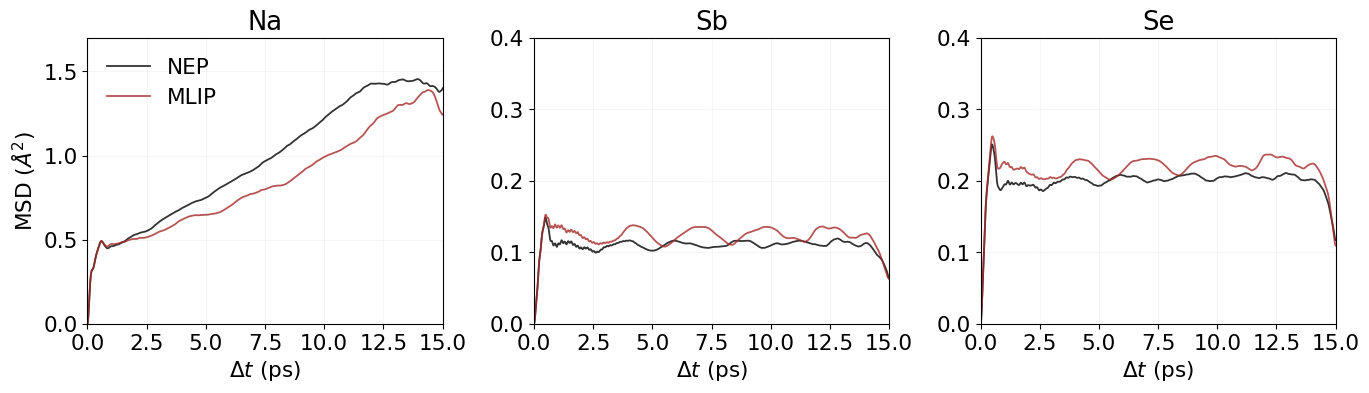

In [16]:
# lets plot the subplots
fig, axs = plt.subplots(1, 3, figsize=(4.7*3, 4.2))

# color cycle
# color_cycle = plt.cm.viridis(np.linspace(0, 1, len(pot_label_lst)))
colors = ['k', 'brown']
# linestyles = ['-', '--']

for id, pot_type in enumerate(pot_label_lst):
    for atom_id, atom_type in enumerate(atom_label_lst):

        time = np.linspace(0, t_tot, N_delt + 1)
        axs[atom_id].plot(time, msd_data[pot_type][atom_type], label=f'{pot_type}', linewidth=1.3, alpha=0.8, color=colors[id])
        axs[atom_id].set_xlabel(r'$\Delta t$ (ps)')
        axs[atom_id].set_title(f'{atom_type}')

        # only set y axis label for the first subplot
        if atom_id == 0:
            axs[atom_id].set_ylabel(r'MSD ($\AA^2$)')
            # set y axis limit
            axs[atom_id].set_ylim([0, 1.7])

        if atom_id == 1:
            # set y axis limit
            axs[atom_id].set_ylim([0, 0.4])

        if atom_id == 2:
            # set y axis limit
            axs[atom_id].set_ylim([0, 0.4])

        # set x axis limit
        axs[atom_id].set_xlim([0, 15])
        # add ticks of 5
        axs[atom_id].set_xticks(np.arange(0, 16, 2.5))
        # add grid
        axs[atom_id].grid(True, alpha=0.1)

        # Add the legend to the first subplot
        if atom_id == 0:
            axs[atom_id].legend(loc='upper left', frameon=False)

# save the figure
plt.tight_layout()
plt.savefig(f'{savefig_dir}/../msd_FOM_300K.png', dpi=300)

## Comparison between FOM and ROM

In [17]:
# load FOM data
root = os.getcwd()
pot_label_lst = ['NEP', 'MLIP']
atom_label_lst = ['Na', 'Sb', 'Se']

# load data
msd_data = {}
for pot_label in pot_label_lst:
    msd_data[pot_label] = {}
    for atom_label in atom_label_lst:
        msd_data[pot_label][atom_label] = np.loadtxt(f'{root}/fom_data_15ps/{pot_label}/compute_msd{atom_label}.txt')

In [18]:
# load ROM data for comparison
root = os.getcwd()
foldername_MOM_Lst = ["1e-0", "1e-1", "1e-2", "1e-3", "1e-4", "1e-5", "0"]
label_weightCoeffSym_lst = ['1', r'$1e^{-1}$', r'$1e^{-2}$', r'$1e^{-3}$', r'$1e^{-4}$', r'$1e^{-5}$', '0']

pot_label_lst = ['NEP', 'MLIP']
atom_label_lst = ['Na', 'Sb', 'Se']

In [19]:
# msd_data_ROM_ALL_trunc_err_lst = []
msd_data_ROM_Global_ALL_trunc_err_lst = []

for trunc_err in trunc_err_Lst:
    ROM_MOM_folderdir = f"{root}/rom_data_15ps/ROM_NVT_{trunc_err}"
    print("Current truncation error: ", trunc_err)
    # msd_data_ROM_ALL_lst = []
    msd_data_ROM_Global_ALL_lst = []

    # we first get the MOM data
    for id_folder, folder_name in enumerate(foldername_MOM_Lst):
        print("Current folder name: ", folder_name)
        # load data
        # msd_data_ROM = {}
        msd_data_ROM_Global = {}

        # for pot_label in pot_label_lst:
        #     msd_data_ROM[pot_label] = {}
        #     print("Current pot label: ", pot_label)
        #     for atom_label in atom_label_lst:
        #         # load text data, if null fill with 0
        #         print("Curr atom label: ", atom_label)
        #         # print(f'{ROM_MOM_folderdir}/gamma_{folder_name}/{pot_label}/msd{atom_label}.data')
        #         msd_data_npy = np.genfromtxt(f'{ROM_MOM_folderdir}/gamma_{folder_name}/{pot_label}/compute_msd{atom_label}.txt', invalid_raise=False, filling_values=0)
        #         # print rows where the data is invalid
        #         # print("Invalid rows = ", np.where(msd_data_npy == 0))
        #         msd_data_ROM[pot_label][atom_label] = msd_data_npy
        #     print("#################")

        # load Global data
        for pot_label in pot_label_lst:
            msd_data_ROM_Global[pot_label] = {}
            print("Current Global pot label: ", pot_label)
            for atom_label in atom_label_lst:
                # load text data, if null fill with 0
                print("Curr atom label: ", atom_label)
                msd_data_Global_npy = np.genfromtxt(f'{ROM_MOM_folderdir}/gamma_{folder_name}/Global/{pot_label}/compute_msd{atom_label}.txt', invalid_raise=False, filling_values=0)
                # print rows where the data is invalid
                # print("Invalid rows = ", np.where(msd_data_Global_npy == 0))
                msd_data_ROM_Global[pot_label][atom_label] = msd_data_Global_npy
            print("#################")

        # store the data
        # msd_data_ROM_ALL_lst.append(msd_data_ROM)
        msd_data_ROM_Global_ALL_lst.append(msd_data_ROM_Global)
    # print("Number of MOM data collected: ", len(msd_data_ROM_ALL_lst))
    print("Number of MOM Global data collected: ", len(msd_data_ROM_Global_ALL_lst))

    # msd_data_ROM_ALL_trunc_err_lst.append(msd_data_ROM_ALL_lst)
    msd_data_ROM_Global_ALL_trunc_err_lst.append(msd_data_ROM_Global_ALL_lst)

Current truncation error:  1e-3
Current folder name:  1e-0
Current Global pot label:  NEP
Curr atom label:  Na
Curr atom label:  Sb
Curr atom label:  Se
#################
Current Global pot label:  MLIP
Curr atom label:  Na
Curr atom label:  Sb
Curr atom label:  Se
#################
Current folder name:  1e-1
Current Global pot label:  NEP
Curr atom label:  Na
Curr atom label:  Sb
Curr atom label:  Se
#################
Current Global pot label:  MLIP
Curr atom label:  Na
Curr atom label:  Sb
Curr atom label:  Se
#################
Current folder name:  1e-2
Current Global pot label:  NEP
Curr atom label:  Na
Curr atom label:  Sb
Curr atom label:  Se
#################
Current Global pot label:  MLIP
Curr atom label:  Na
Curr atom label:  Sb
Curr atom label:  Se
#################
Current folder name:  1e-3
Current Global pot label:  NEP
Curr atom label:  Na
Curr atom label:  Sb
Curr atom label:  Se
#################
Current Global pot label:  MLIP
Curr atom label:  Na
Curr atom label:  Sb

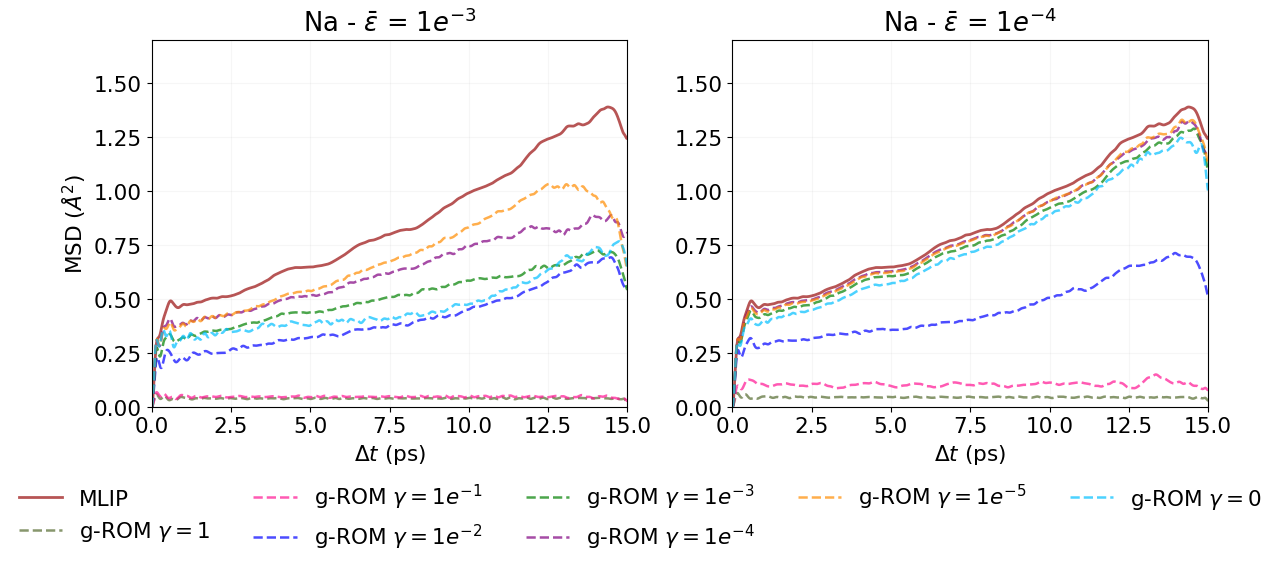

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(5.8*2, 5.3))

# color cycle for x num models
colors = ['darkolivegreen', 'deeppink', 'blue', 'green', 'purple', 'darkorange', 'deepskyblue', 'olive',]
# pot_types = ['NEP', 'MLIP']
# line_styles = ['-', '--', '-.', ':', (0, (3, 10, 1, 10)), (0, (3, 1, 1, 1)), (0, (3, 5, 1, 5)), (0, (3, 1, 1, 1, 1, 1))]

chosen_TruncErr_id = [0, 1]
# chosen_TruncErr_id = [2, 3] 

labels = []
lines = []

chosenPot = 'MLIP'
labels.append(chosenPot)

if chosenPot == 'NEP':
    chosenColor = 'k'
elif chosenPot == 'MLIP':
    chosenColor = 'brown'

# we are only plotting NEP and Na
for ax_id, trunc_err_id in enumerate(chosen_TruncErr_id):
    atom_id = 0
    atom_type = atom_label_lst[atom_id]
    line, = axs[ax_id].plot(time, msd_data[chosenPot][atom_type], linewidth=2, color=chosenColor, linestyle='-', alpha=0.8)
    lines.append(line)

    time = np.linspace(0, t_tot, N_delt + 1)

    for id_MOM_folder, folder_name in enumerate(foldername_MOM_Lst):
        line, = axs[ax_id].plot(time, msd_data_ROM_Global_ALL_trunc_err_lst[trunc_err_id][id_MOM_folder][chosenPot][atom_type],
                                 linewidth=1.8, alpha=0.7, color=colors[id_MOM_folder], linestyle='--')
        label = rf'g-ROM $\gamma=${label_weightCoeffSym_lst[id_MOM_folder]}'
        if label not in labels:
            labels.append(label)
            lines.append(line)

    axs[ax_id].set_xlabel(r'$\Delta t$ (ps)')
    axs[ax_id].set_ylim([0, 1.7])
    axs[ax_id].set_xlim([0, 15])
    axs[ax_id].set_xticks(np.arange(0, 16, 2.5))
    # yticks of 0.25
    axs[ax_id].set_yticks(np.arange(0, 1.6, 0.25))
    axs[ax_id].grid(True, alpha=0.1)
    axs[ax_id].set_title(f'{atom_type} - $\\bar{{\\epsilon}}$ = {label_trunc_err_Lst[trunc_err_id]}')

axs[0].set_ylabel(r'MSD ($\AA^2$)')

# Create a single legend below the plots
fig.legend(lines, labels, loc='upper center', ncol=5, bbox_to_anchor=(0.52, 0.15), frameon=False)
plt.tight_layout(rect=[0, 0.1, 1.05, 1.05])
plt.savefig(f'{savefig_dir}/msd_FOM_ROM_Na_Global_{chosenPot}_{chosen_TruncErr_id[0]}_{chosen_TruncErr_id[1]}.png', dpi=300, bbox_inches='tight')


In [40]:
# fig, axs = plt.subplots(1, 2, figsize=(5.2*2, 4.7))

# # color cycle for x num models
# colors = ['blue', 'green', 'purple', 'orange', 'pink', 'gray', 'olive', 'cyan']
# pot_types = ['NEP', 'MLIP']
# # line_styles = ['-', '--', '-.', ':', (0, (3, 10, 1, 10)), (0, (3, 1, 1, 1)), (0, (3, 5, 1, 5)), (0, (3, 1, 1, 1, 1, 1))]

# labels = []
# lines = []

# for ax_id, pot_type in enumerate(pot_types):
#     atom_id = 0  # first atom
#     atom_type = atom_label_lst[atom_id]
#     # FOM
#     line, = axs[ax_id].plot(msd_data[pot_type][atom_type][:numSS_15ps, 0] * dt_sim, msd_data[pot_type][atom_type][:numSS_15ps, -1], 
#                     linewidth=1.3, color="k" if pot_type == 'NEP' else "brown", linestyle='-')
#     if pot_type not in labels:
#         labels.append(pot_type)
#         lines.append(line)

# for id_MOM_folder, folder_name in enumerate(foldername_MOM_Lst):
#     for ax_id, pot_type in enumerate(pot_types):
#         atom_id = 0  # first atom
#         atom_type = atom_label_lst[atom_id]
#         line, = axs[ax_id].plot(msd_data_ROM_Global_ALL_lst[id_MOM_folder][pot_type][atom_type][:, 0] * dt_sim, msd_data_ROM_Global_ALL_lst[id_MOM_folder][pot_type][atom_type][:, -1], 
#                         linewidth=1, alpha=0.8, color=colors[id_MOM_folder], linestyle='--')
#         label = rf'g-ROM $\gamma=${label_weightCoeffSym_lst[id_MOM_folder]}'
#         if label not in labels:
#             labels.append(label)
#             lines.append(line)

# axs[0].set_xlabel('Time (ps)')
# axs[0].set_ylabel(r'MSD ($\AA^2$)')
# axs[0].set_ylim([0, 1.6])
# axs[0].set_xlim([0, 15])
# axs[0].set_xticks(np.arange(0, 16, 2.5))
# axs[0].grid(True, alpha=0.1)
# axs[0].set_title(f'{atom_type} - {pot_types[0]}')

# axs[1].set_xlabel('Time (ps)')
# # axs[1].set_ylabel(r'MSD ($\AA^2$)')
# axs[1].set_ylim([0, 1.6])
# axs[1].set_xlim([0, 15])
# axs[1].set_xticks(np.arange(0, 16, 2.5))
# axs[1].grid(True, alpha=0.1)
# axs[1].set_title(f'{atom_type} - {pot_types[1]}')

# # Create a single legend below the plots
# fig.legend(lines, labels, loc='upper center', ncol=4, bbox_to_anchor=(0.52, 0.15), frameon=True)

# # Adjust layout to make room for the legend
# plt.tight_layout(rect=[0, 0.1, 1, 1])
# # plt.savefig(f'{savefig_dir}/msd_FOM_ROM_Na_Global_eps{trunc_err}.png', dpi=300, bbox_inches='tight')


In [110]:
# # lets plot of subplots for 2 potentials
# fig, axs = plt.subplots(1, 2, figsize=(4.8*2, 4.3))

# # color cycle for x num models
# colors = ['blue', 'green', 'purple', 'orange', 'pink', 'gray', 'olive', 'cyan']
# pot_types = ['NEP', 'MLIP']

# for ax_id, pot_type in enumerate(pot_types):
#     atom_id = 0  # first atom
#     atom_type = atom_label_lst[atom_id]
#     # FOM
#     axs[ax_id].plot(msd_data[pot_type][atom_type][:numSS_15ps, 0] * dt_sim, msd_data[pot_type][atom_type][:numSS_15ps, -1], 
#                     label=f'{pot_type}', linewidth=1.3, color="k" if pot_type == 'NEP' else "brown")
#     ### MOM data
#     for id_MOM_folder, folder_name in enumerate(foldername_MOM_Lst):
#         # Global
#         axs[ax_id].plot(msd_data_ROM_Global_ALL_lst[id_MOM_folder][pot_type][atom_type][:, 0] * dt_sim, msd_data_ROM_Global_ALL_lst[id_MOM_folder][pot_type][atom_type][:, -1], 
#                         label=rf'ROM$_g$ $\gamma=${label_weightCoeffSym_lst[id_MOM_folder]}', linewidth=1, alpha=0.8, color=colors[id_MOM_folder], linestyle='--')
#     axs[ax_id].set_xlabel('Time (ps)')
#     axs[ax_id].set_title(f'{atom_type} - {pot_type}')
#     if ax_id == 0:  # only for the first subplot
#         axs[ax_id].set_ylabel(r'MSD ($\AA^2$)')
#     axs[ax_id].set_ylim([0, 1.6])
#     axs[ax_id].set_xlim([0, 15])
#     axs[ax_id].set_xticks(np.arange(0, 16, 2.5))
#     axs[ax_id].grid(True, alpha=0.1)
#     axs[ax_id].legend(fontsize=9, loc='upper left', framealpha=0.5)

# # save the figure
# plt.tight_layout()
# plt.savefig(f'{savefig_dir}/msd_FOM_ROM_Na_Global_eps{trunc_err}.png', dpi=300)

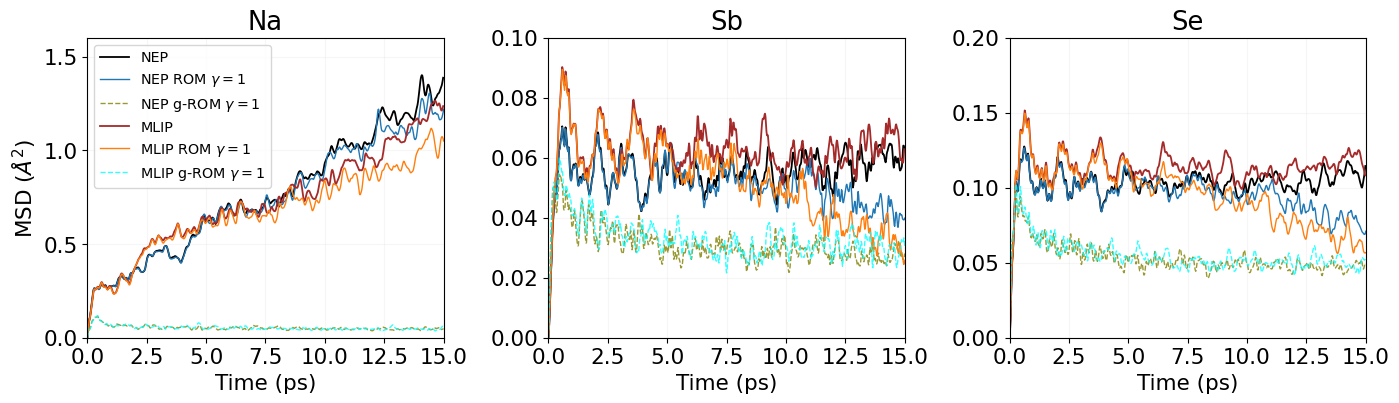

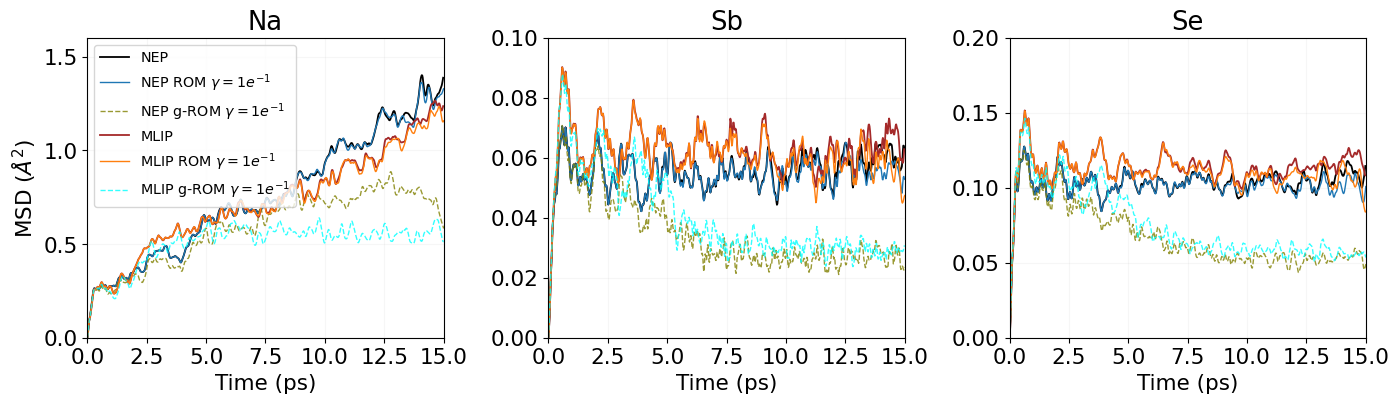

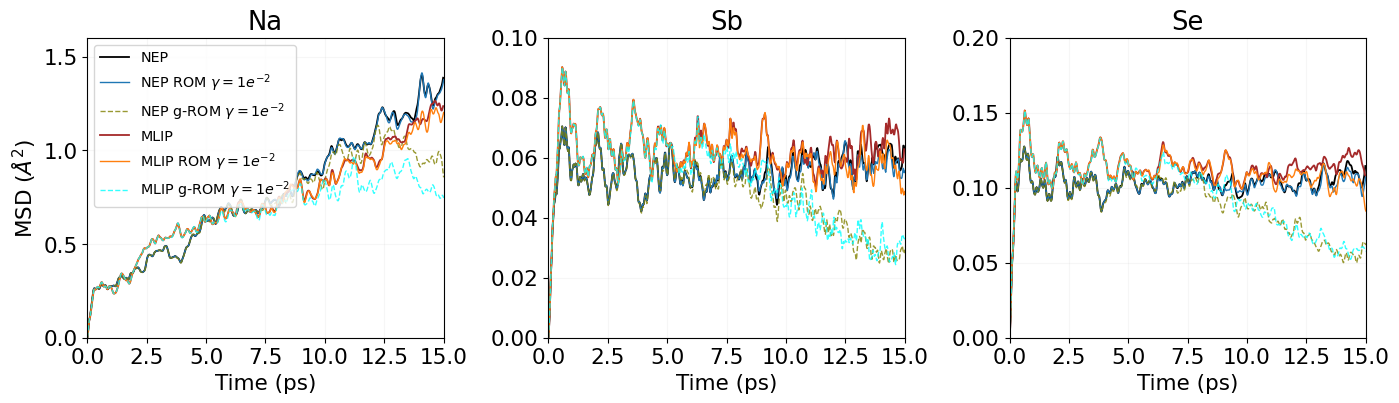

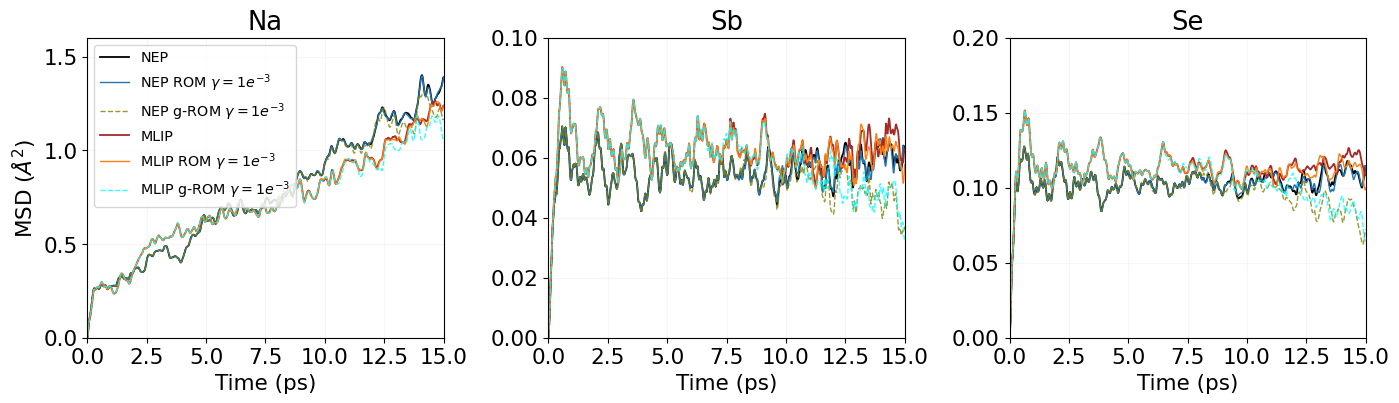

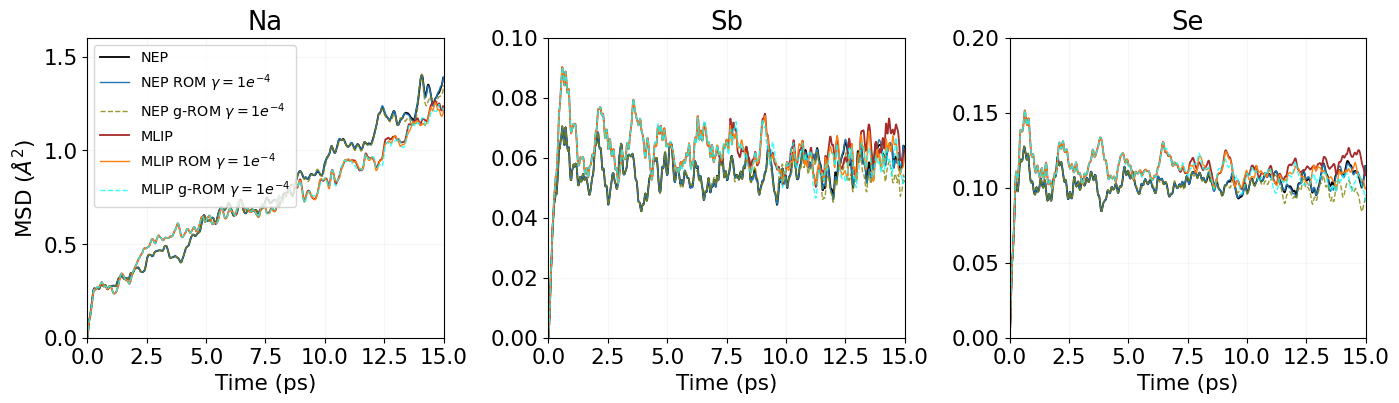

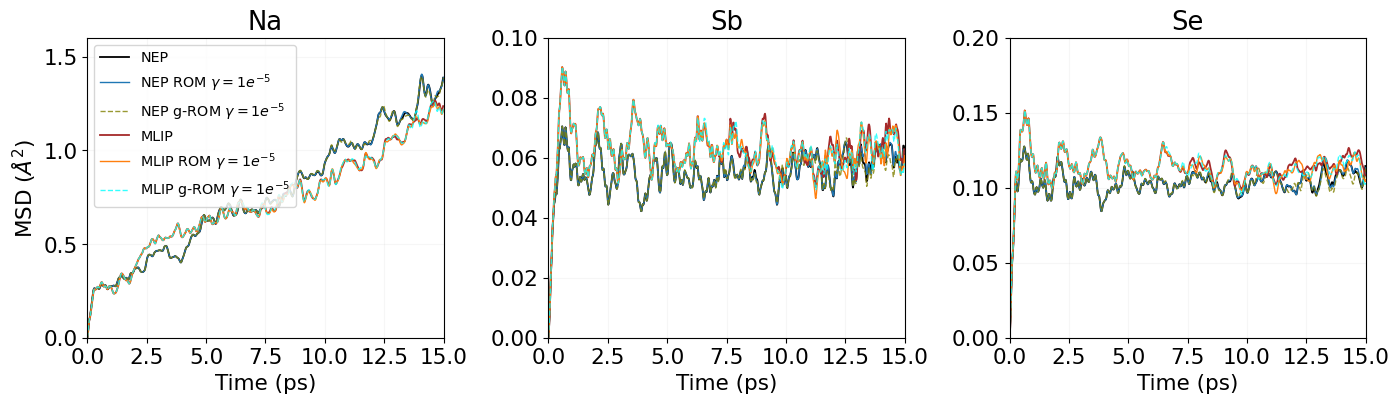

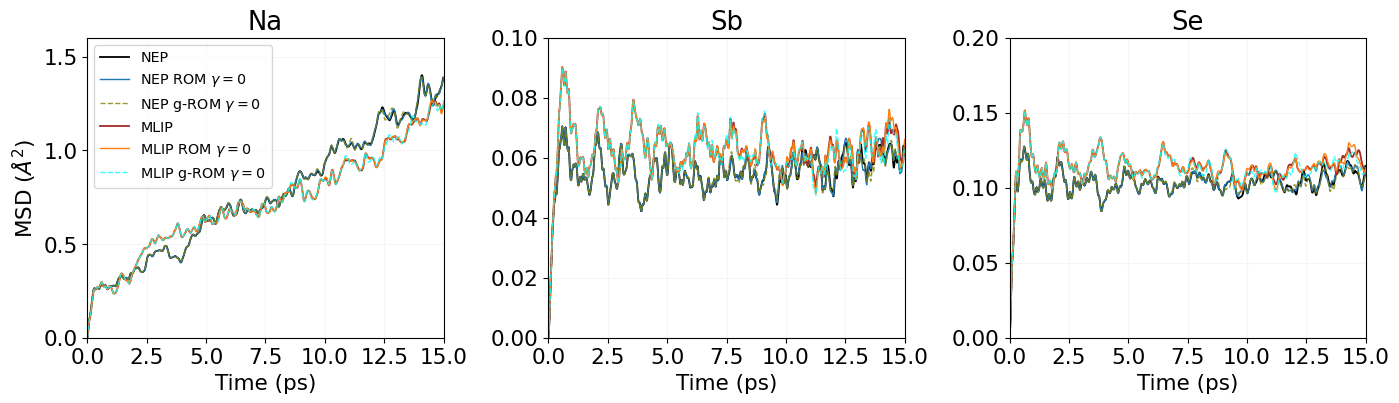

In [ ]:
# # plot all of the folders individually, and the last being the without MOM
# for id_folder, folder_name in enumerate(foldername_MOM_Lst):
#     # lets plot of subplots for 1 potential
#     fig, axs = plt.subplots(1, 3, figsize=(4.8*3, 4.3))
#     colors = ['blue', 'green', 'purple', 'orange', 'pink', 'gray', 'olive', 'cyan']
#     colors_FOM = ['k', 'brown']

#     for id, pot_type in enumerate(pot_label_lst):
#         for atom_id, atom_type in enumerate(atom_label_lst):
#             # FOM
#             axs[atom_id].plot(msd_data[pot_type][atom_type][:numSS_15ps, 0] * dt_sim, msd_data[pot_type][atom_type][:numSS_15ps, -1], 
#                               label=f'{pot_type}', linewidth=1.3, color=colors_FOM[id])
#             ### MOM data
#             # ROM
#             axs[atom_id].plot(msd_data_ROM_ALL_lst[id_folder][pot_type][atom_type][:, 0] * dt_sim, msd_data_ROM_ALL_lst[id_folder][pot_type][atom_type][:, -1],
#                                label=rf'{pot_type} ROM $\gamma=${label_weightCoeffSym_lst[id_folder]}', linewidth=1, alpha=1, linestyle='-')
#             # Global
#             axs[atom_id].plot(msd_data_ROM_Global_ALL_lst[id_folder][pot_type][atom_type][:, 0] * dt_sim, msd_data_ROM_Global_ALL_lst[id_folder][pot_type][atom_type][:, -1], 
#                               label=rf'{pot_type} g-ROM $\gamma=${label_weightCoeffSym_lst[id_folder]}', linewidth=1, alpha=0.8, color=colors[-2+id], linestyle='--')


#             axs[atom_id].set_xlabel('Time (ps)')
#             axs[atom_id].set_title(f'{atom_type}')
#             # axs[atom_id].legend(fontsize=9)

#             # only set y axis label for the first subplot
#             if atom_id == 0:
#                 axs[atom_id].set_ylabel(r'MSD ($\AA^2$)')
#                 # set y axis limit
#                 axs[atom_id].set_ylim([0, 1.6])

#             if atom_id == 1:
#                 # set y axis limit
#                 axs[atom_id].set_ylim([0, 0.1])

#             if atom_id == 2:
#                 # set y axis limit
#                 axs[atom_id].set_ylim([0, 0.2])

#             # set x axis limit
#             axs[atom_id].set_xlim([0, 15])
#             # add ticks of 5
#             axs[atom_id].set_xticks(np.arange(0, 16, 2.5))
#             # add grid
#             axs[atom_id].grid(True, alpha=0.1)

#             # Add the legend to the last subplot
#             if atom_id == 0:
#                 axs[atom_id].legend(fontsize=10.3, loc='upper left')

#     # save the figure
#     plt.tight_layout()
#     plt.savefig(f'{savefig_dir}/msd_FOM_ROM_Global_eps{trunc_err}_gam{folder_name}.png', dpi=300)